In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# create a dataframe
dataset_train = pd.read_csv('data/NSE-TATAGLOBAL.csv')
dataset_train = dataset_train[::-1]  #inverse the data
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [3]:
# convert the dataframe to a numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# create the scaled training dataset
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [6]:
# convert the x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# reshape the data to 3 dimentional array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# import machine learning libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# build the LSTM model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# last LSTM layer which return sequences is False
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [10]:
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
# train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 100ms/step - loss: 0.0112
Epoch 2/100
62/62 [==============================] - 6s 100ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 6s 101ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 6s 98ms/step - loss: 0.0029
Epoch 5/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0025
Epoch 7/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 6s 100ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0025
Epoch 10/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 6s 100ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0018
Epoch 13/100
62/62 

In [12]:
# create test dataset
dataset_test = pd.read_csv('data/tatatest.csv')
dataset_test = dataset_test[::-1]
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
# get the model predicted price values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

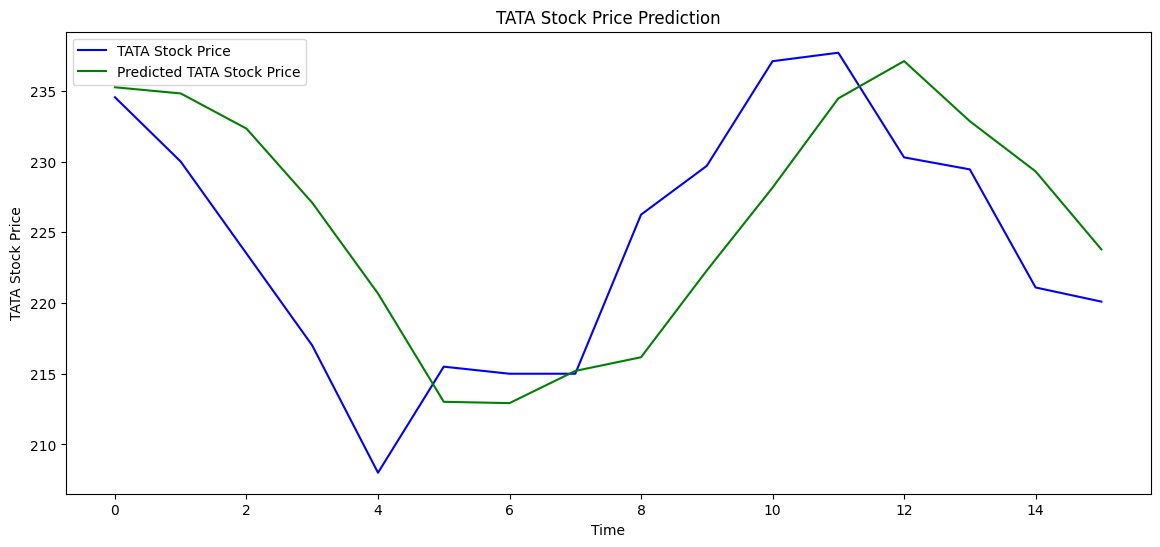

In [14]:
# plot the data
plt.figure(figsize=(14,6))
plt.plot(real_stock_price, color = 'blue', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')

plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()